In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
x = np.random.uniform(-10, 10, (1000,1))
y = np.random.uniform(-10, 10, (1000,1))
inputs = np.column_stack((x, y))
inputs.shape

(1000, 2)

In [3]:
noise = np.random.uniform(-1, 1, (1000,1))
targets = 2*x - 3*y + 5 + noise
targets.shape

(1000, 1)

In [4]:
np.savez('TF_Minimal_Example_Custom_Data', inputs=inputs, targets=targets)

In [5]:
data = np.load('./TF_Minimal_Example_Custom_Data.npz')

In [6]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                  kernel_initializer=tf.random_uniform_initializer(-0.1, 0.1),
                                                   bias_initializer=tf.random_uniform_initializer(-0.1, 0.1)
                                                  )])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(data['inputs'], data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.5227    
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9977 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5596 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3710 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4107 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3889 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4476 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4071 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4019 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4383 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4644 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3735 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4160 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4010 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0431657],
       [-3.0723507]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([5.023522], dtype=float32)

In [9]:
prediction = model.predict_on_batch(data['inputs'])

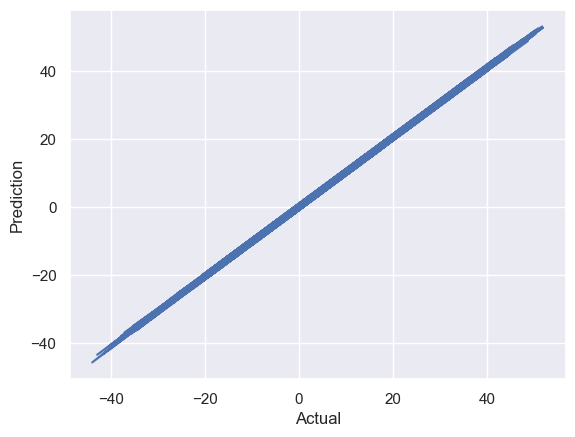

In [10]:
plt.plot(data['targets'], prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()